## Comparison of results

In [3]:
!pip install -U scikit-learn

In [2]:
pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
from pathlib import Path
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

project_dir = Path(Path.cwd()).resolve().parents[1]

results_advanced_approaches = pd.read_csv(project_dir / "references/model results/test_data_with_advanced_predictions.csv")

In [6]:
def get_embedding_type(model_name):
    if 'Bert_Base' in model_name or 'Bert_Large' in model_name:
        return 'bert'
    elif 'GPT' in model_name:
        return 'gpt'
    else:
        return model_name.split('_')[0]  # Assuming the embedding is the first part of the column name

# Extracting model names from the column names
model_names = [col for col in results_advanced_approaches.columns if 'Prediction' in col]

# List to store the results
results_list = []

# Calculating metrics for each model
for model_name in model_names:
    y_pred = results_advanced_approaches[model_name]
    y_true = results_advanced_approaches['Label']

    # Metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    # Embedding type
    embedding_type = get_embedding_type(model_name)

    # Append results
    results_list.append({
        "model": model_name,
        "data": embedding_type,
        "accuracy_oos": accuracy,
        "precision_oos": precision,
        "recall_oos": recall,
        "f1_oos": f1
    })

In [7]:
# Convert the results to a DataFrame
results_df = pd.DataFrame(results_list)

In [8]:
def reformat_model_name(model_name):
    # Remove the '_Prediction' part
    if '_Prediction' in model_name:
        model_name = model_name.replace('_Prediction', '')
    
 
    
    # Remove the embedding type if it is not 'Bert_Base' or 'GPT'
    if not model_name in ['Bert_Base','Bert_Large', 'GPT']:
        parts = model_name.split('_')
        if len(parts) > 1:  # If there is an embedding type to remove
            model_name = '_'.join(parts[1:])
    
    return model_name

# Apply the reformat_model_name function to each model name in the dataframe
results_df['model'] = results_df['model'].apply(reformat_model_name)

# Display the updated dataframe
results_df.head(len(results_df))

,model,data,accuracy_oos,precision_oos,recall_oos,f1_oos
0,Bert_Base,bert,0.932331,0.833333,0.500000,0.625000
1,Bert_Large,bert,0.906015,0.857143,0.200000,0.324324
2,GPT,gpt,0.962406,0.916667,0.733333,0.814815
3,RNN,gpt,0.887218,0.000000,0.000000,0.000000
4,RNN,fasttext,0.887218,0.000000,0.000000,0.000000
5,RNN,word2vec,0.887218,0.000000,0.000000,0.000000
6,RNN,glove,0.887218,0.000000,0.000000,0.000000
7,RNN,bert,0.887218,0.000000,0.000000,0.000000
8,RNN,tfidf,0.887218,0.000000,0.000000,0.000000
9,RNN_Tuned,gpt,0.887218,0.000000,0.000000,0.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df['model'] = results_df['model'].replace('GPT', 'GPT3.5')


### Grouped bar chart

<Figure size 1500x800 with 0 Axes>

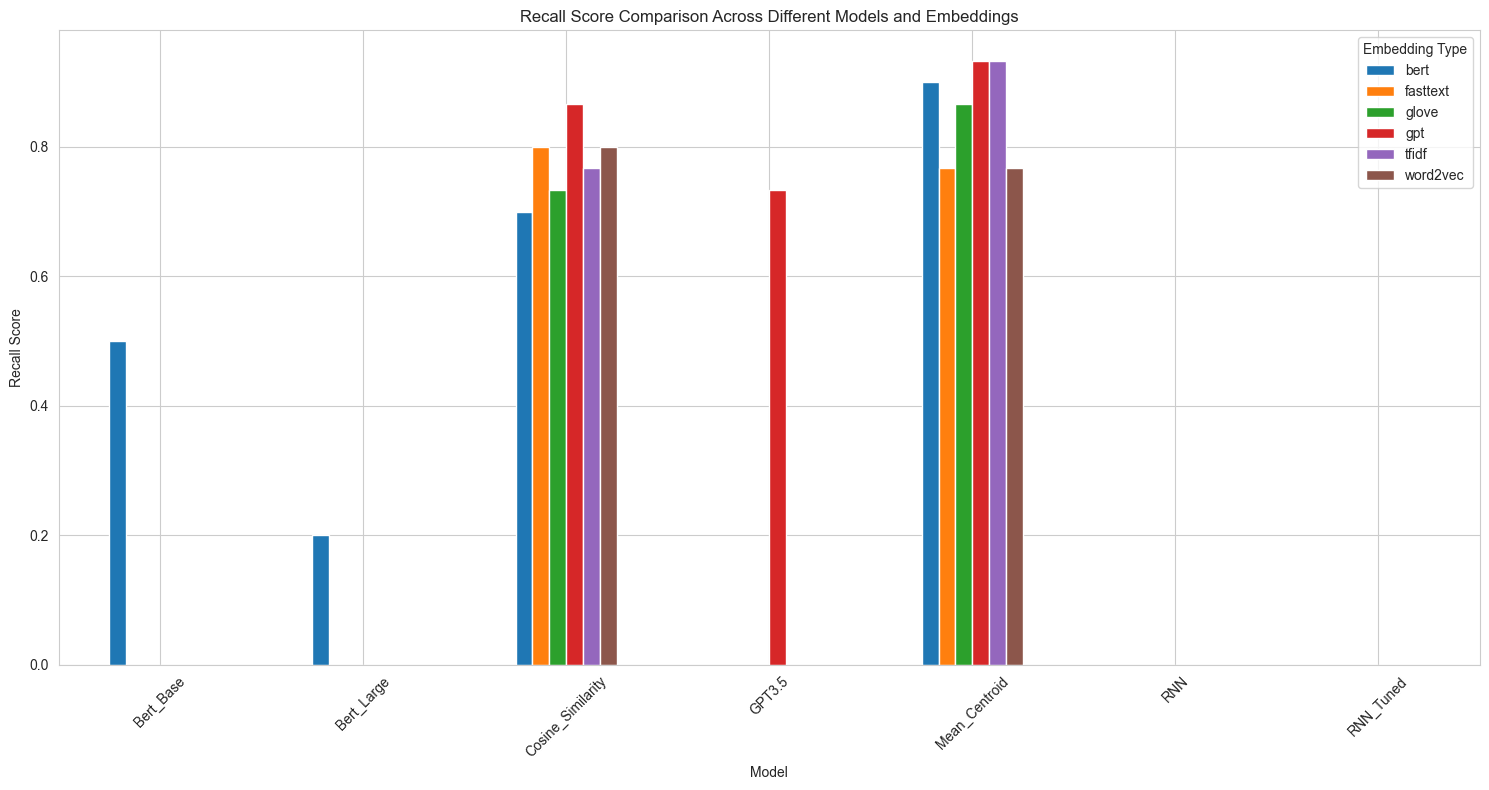

In [10]:
pivot_df = results_df.pivot(index='model', columns='data', values='recall_oos')
plt.figure(figsize=(15, 8))
pivot_df.plot(kind='bar', figsize=(15, 8))
plt.title('Recall Score Comparison Across Different Models and Embeddings')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.xticks(rotation=45)
plt.legend(title='Embedding Type')
plt.tight_layout()
plt.show()

## Heatmap

In [11]:
def create_and_save_recall_heatmap(df: pd.DataFrame, title_extension: str, filename : str, model_col='model', data_col='data', recall_col='recall_oos', save_path=project_dir/'references/model results'  ):
    """
    This function creates and returns a heatmap of recall scores for different models and embeddings.

    Parameters:
    - df (pd.DataFrame): The dataframe containing the model evaluation results.
    - title_extension (str): The title extension to add to the plot.
    - filename (str): The filename to save the plot.
    - model_col (str): The name of the column in df that contains the model names.
    - data_col (str): The name of the column in df that contains the embedding type names.
    - recall_col (str): The name of the column in df that contains the recall scores.
    - rename_dict (dict): A dictionary to rename models if needed, e.g., {'GPT': 'GPT3.5'}.

    Returns:
    - ax (matplotlib.axes.Axes): The Axes object with the heatmap.
    """
    df = df.copy()
    
    grouped_df = df.groupby([model_col, data_col]).mean()[recall_col].reset_index()
    
    pivot_df = grouped_df.pivot(index=model_col, columns=data_col, values=recall_col)

    # Plotting the heatmap
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
    plt.title('Recall Score Heatmap Across Different Models and Embeddings' + '\n' + title_extension)
    plt.xlabel('Embedding Type')
    plt.ylabel('Model')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    ax.get_figure().savefig(save_path / filename)
    
    return ax




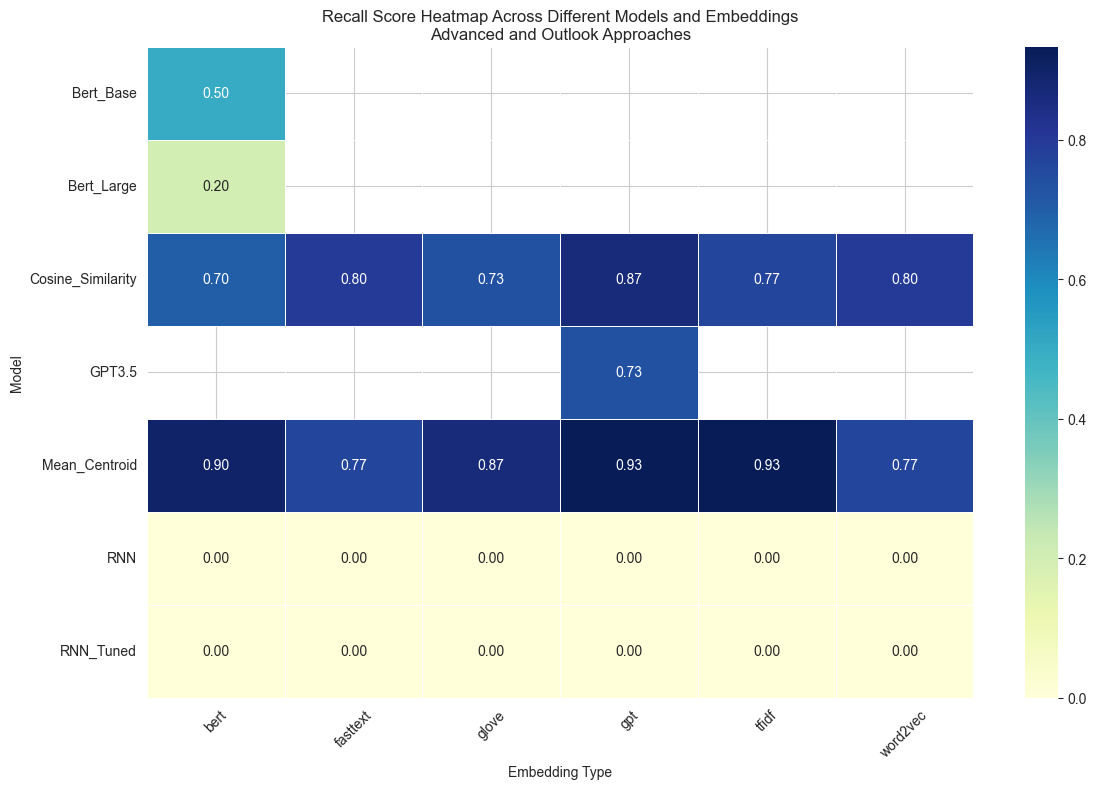

In [12]:
ax = create_and_save_recall_heatmap(results_df, title_extension='Advanced and Outlook Approaches', filename='recall_heatmap_advanced_and_outlook_approaches.png')
plt.show()


## Traditional ML

### Combined 

In [18]:
model_results_combined_tuned = pd.read_csv(project_dir / "references/model results/model_evaluation_results_combined_tuned_0130-1351.csv")

In [20]:
model_results_combined_tuned

,model,data,accuracy_is,accuracy_oos,precision_oos,recall_oos,f1_oos
0,GaussianNB,gpt,0.375150,0.484962,0.125874,0.600000,0.208092
1,GradientBoostingClassifier,gpt,0.921969,0.898496,1.000000,0.100000,0.181818
2,SGDClassifier,gpt,0.910564,0.887218,0.000000,0.000000,0.000000
3,RandomForestClassifier,gpt,1.000000,0.962406,1.000000,0.666667,0.800000
4,BernoulliNB,gpt,0.540216,0.601504,0.160714,0.600000,0.253521
5,DecisionTreeClassifier,gpt,0.957383,0.936090,1.000000,0.433333,0.604651
6,Logistic_Regression,gpt,0.997599,0.951128,0.793103,0.766667,0.779661
7,SVC,gpt,0.910564,0.887218,0.000000,0.000000,0.000000
8,Perceptron,gpt,0.089436,0.112782,0.112782,1.000000,0.202703
9,GaussianNB,fasttext,0.622449,0.714286,0.189189,0.466667,0.269231


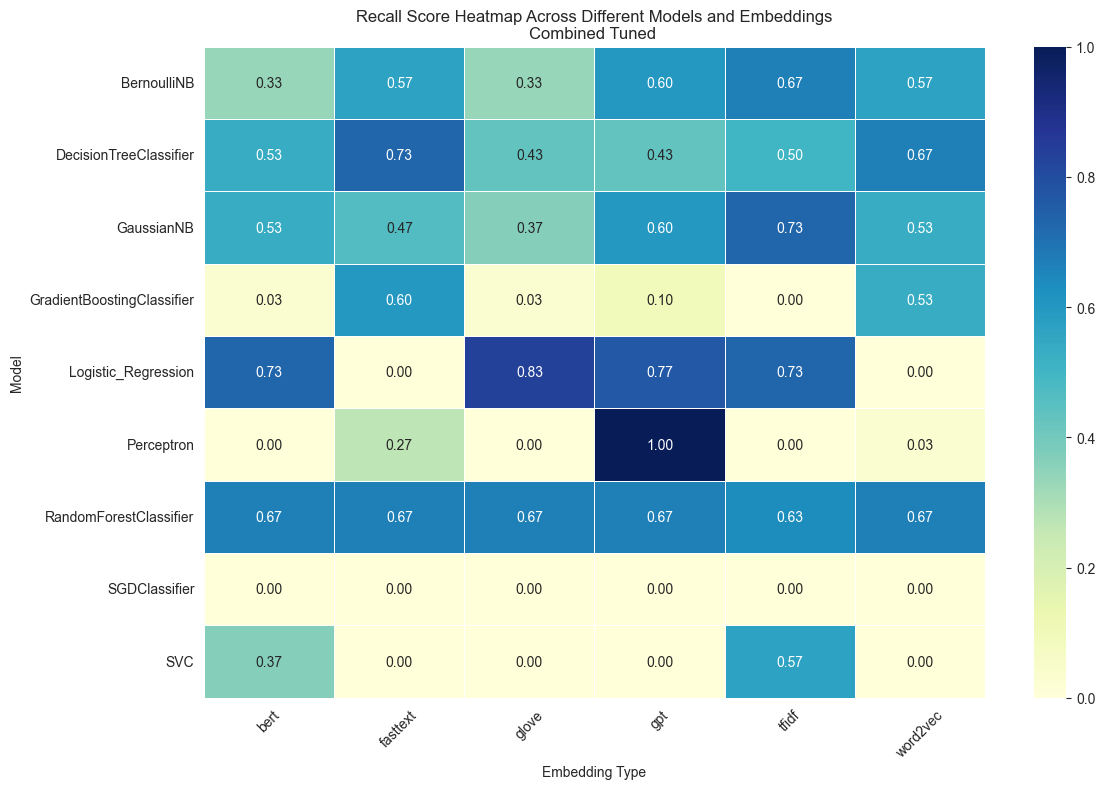

In [21]:
grouped_new_df = model_results_combined_tuned.groupby(['model', 'data']).mean()['recall_oos'].reset_index()

# Rename 'GPT' to 'GPT3.5' in the 'model' column if it exists
grouped_new_df['model'] = grouped_new_df['model'].replace('GPT', 'GPT3.5')
ax = create_and_save_recall_heatmap(grouped_new_df, title_extension = "Combined Tuned ", filename = "recall_heatmap_combined_tuned.png")
plt.show()

In [16]:
model_results_combined_tuned = pd.read_csv(project_dir / "references/model results/model_evaluation_results_combined_no_tuning_0130-1347.csv")

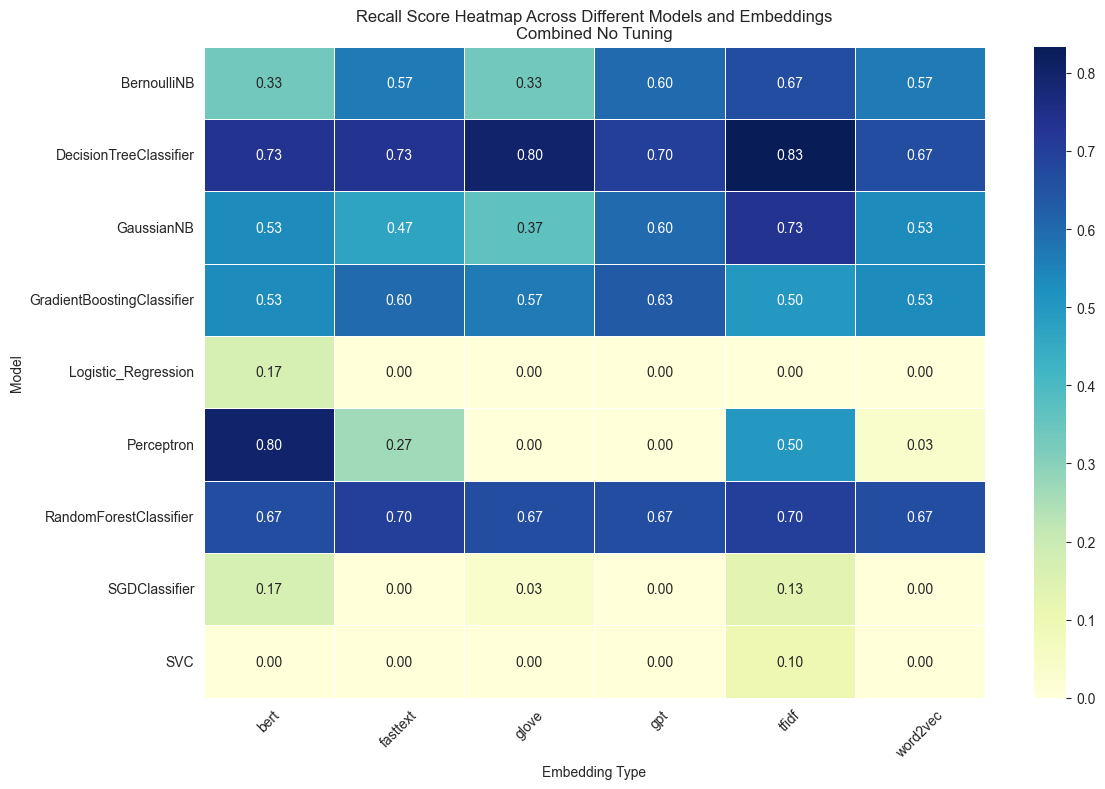

In [17]:
grouped_new_df = model_results_combined_tuned.groupby(['model', 'data']).mean()['recall_oos'].reset_index()
ax = create_and_save_recall_heatmap(grouped_new_df, title_extension = "Combined No Tuning", filename = "recall_heatmap_combined_no_tuning.png")
plt.show()

### Separate

In [24]:
model_results_separate_tuned = pd.read_csv(project_dir / "references/model results/model_evaluation_results_separate_tuned_0130-1359.csv")

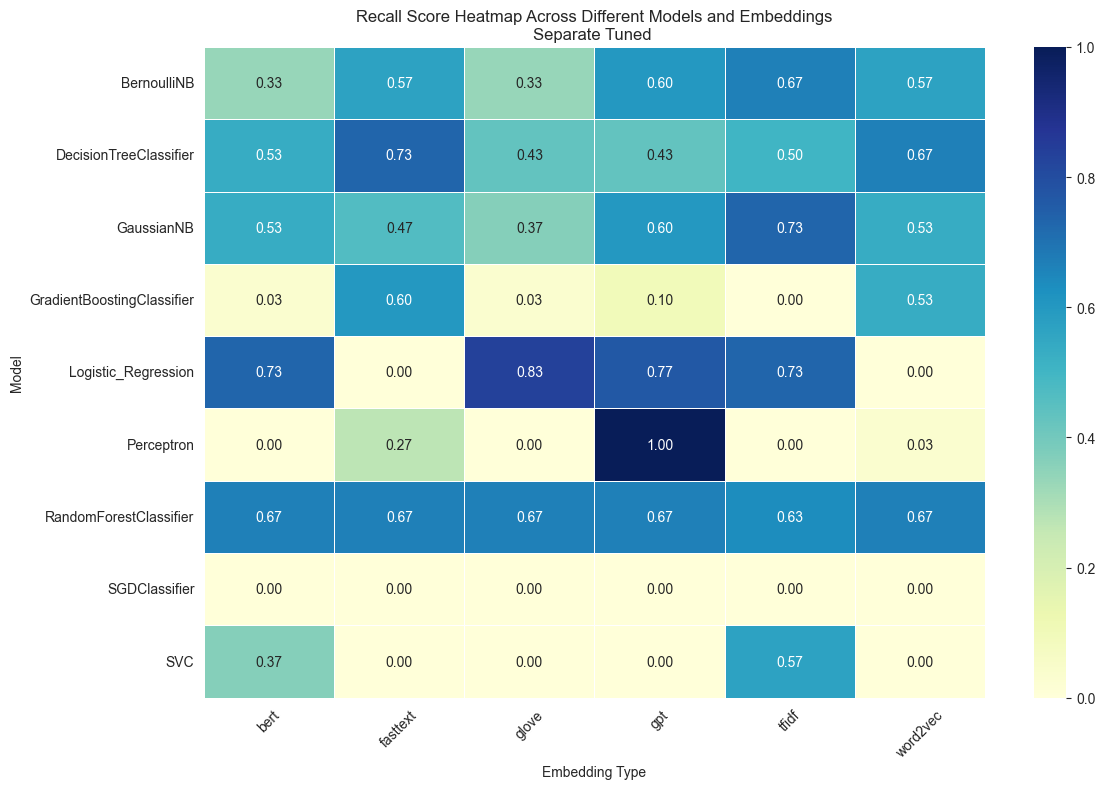

In [25]:
grouped_new_df = model_results_combined_tuned.groupby(['model', 'data']).mean()['recall_oos'].reset_index()

ax = create_and_save_recall_heatmap(grouped_new_df, title_extension = "Separate Tuned ", filename = "recall_heatmap_separate_tuned.png")
plt.show()

In [22]:
model_results_separate_tuned = pd.read_csv(project_dir / "references/model results/model_evaluation_results_separate_no_tuning_0130-1355.csv")

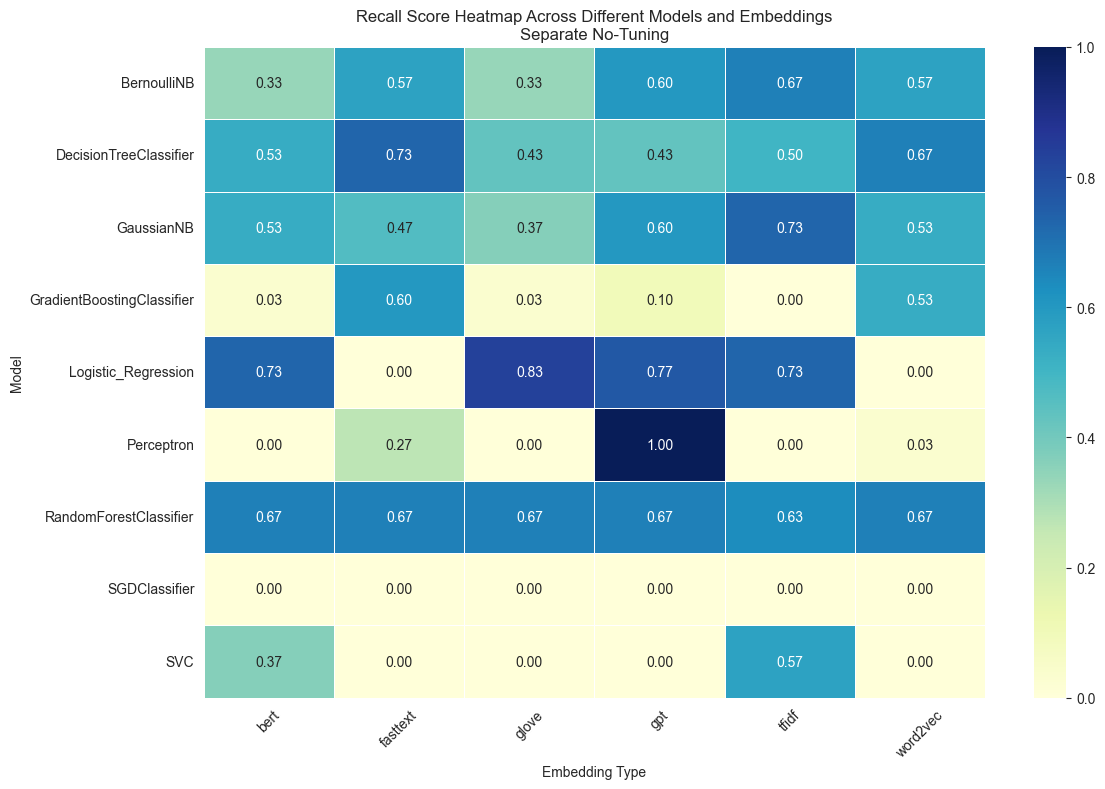

In [23]:
grouped_new_df = model_results_combined_tuned.groupby(['model', 'data']).mean()['recall_oos'].reset_index()

ax = create_and_save_recall_heatmap(grouped_new_df, title_extension = "Separate No-Tuning", filename = "recall_heatmap_separate_no_tuning.png")
plt.show()